In [0]:
!pip install scikit-plot

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
df= pd.read_csv("train.csv")

In [0]:
dx = pd.DataFrame(df.drop(['Activity','subject'],axis=1))
dy_label = df.Activity.values.astype(object)

In [0]:
from sklearn import linear_model
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [0]:
# encoding train labels 
encoder.fit(dy_label)
dy = encoder.transform(dy_label)

In [0]:
#SVD APPLY
from sklearn.decomposition import PCA,TruncatedSVD
svd= TruncatedSVD(n_components = 100)
x=svd.fit(dx).transform(dx)
svd.explained_variance_

array([15.81435622, 19.89542722,  2.46440779,  2.074266  ,  0.96149788,
        0.83862051,  0.6757628 ,  0.64728367,  0.55605685,  0.53488731,
        0.47352632,  0.41316063,  0.3485229 ,  0.32193186,  0.30815253,
        0.27628144,  0.26285824,  0.24525423,  0.23931494,  0.2368935 ,
        0.22819231,  0.21856582,  0.20822338,  0.19542522,  0.18494218,
        0.1822536 ,  0.1746681 ,  0.1679705 ,  0.16212413,  0.16017619,
        0.15683081,  0.15379591,  0.14518502,  0.14208205,  0.13026747,
        0.12806285,  0.12419342,  0.12341213,  0.11702718,  0.11550953,
        0.11285474,  0.10664554,  0.10443699,  0.10074032,  0.09975222,
        0.0908902 ,  0.08905822,  0.08734564,  0.0871333 ,  0.08477161,
        0.08264854,  0.07858029,  0.07646582,  0.07078369,  0.06999507,
        0.06748912,  0.0660801 ,  0.06404907,  0.06296528,  0.06165746,
        0.06097722,  0.05942244,  0.05811484,  0.05753156,  0.05618978,
        0.05500732,  0.0540023 ,  0.05170941,  0.05081611,  0.04

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x,dy,test_size=0.2, random_state=4)

In [0]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (5881, 100)
Dimension of Test set (1471, 100) 



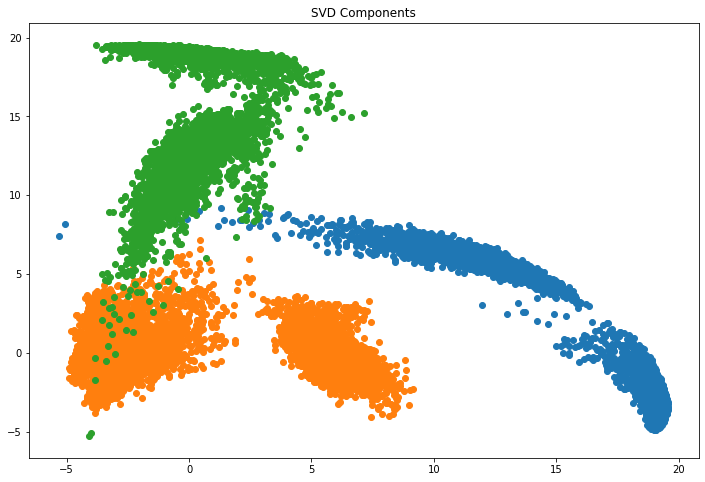

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8)) 
plt.title('SVD Components')
plt.scatter(X_train[:,0], X_train[:,1]) 
plt.scatter(X_train[:,1], X_train[:,2])
plt.scatter(X_train[:,2], X_train[:,0])

In [0]:
#LINEAR REGRESSION

reg= linear_model.LinearRegression()
reg.fit(X_test,Y_test)
reg.score(X_test,Y_test)

0.948174812170856

In [0]:
#train
reg.fit(X_train,Y_train)
reg.score(X_train,Y_train)

0.944498371678085

In [0]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,Y_train)
pred1 = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scikitplot as skplt

For Logistic Regression accuracy score is  0.9782460910944936
For  Logistic Regression confusion_matrix is: 

 [[262   0   0   0   0   0]
 [  1 269  14   0   0   0]
 [  0  10 265   0   0   1]
 [  0   0   0 239   0   1]
 [  0   0   0   0 175   3]
 [  0   0   0   2   0 229]]
For  Logistic Regression Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.96      0.95      0.96       284
           2       0.95      0.96      0.95       276
           3       0.99      1.00      0.99       240
           4       1.00      0.98      0.99       178
           5       0.98      0.99      0.98       231

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



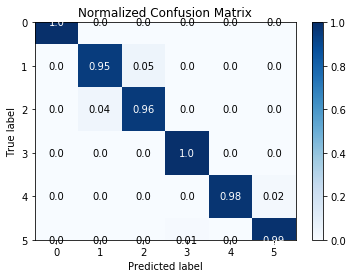

In [0]:
print('For Logistic Regression accuracy score is ',accuracy_score(Y_test,pred1))
print('For  Logistic Regression confusion_matrix is: \n\n',confusion_matrix(Y_test,pred1))
print ('For  Logistic Regression Classification Report: \n\n',classification_report(Y_test,pred1))
skplt.metrics.plot_confusion_matrix(Y_test, pred1, normalize=True)
plt.show()

In [0]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = "most_frequent", axis = 0)
imp = imp.fit(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
X_train_imp = imp.transform(X_train)
fit_random_forest = RandomForestClassifier(random_state = 42)
fit_random_forest.fit(X_train_imp, Y_train);
X_test_imp = imp.transform(X_test)
y_predicted = fit_random_forest.predict(X_test_imp)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


89.6 %
[[261   0   0   0   0   1]
 [  4 230  49   0   0   1]
 [  7  53 216   0   0   0]
 [  0   0   0 234   3   3]
 [  0   0   0   9 169   0]
 [  0   0   0  11  12 208]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       262
           1       0.81      0.81      0.81       284
           2       0.82      0.78      0.80       276
           3       0.92      0.97      0.95       240
           4       0.92      0.95      0.93       178
           5       0.98      0.90      0.94       231

    accuracy                           0.90      1471
   macro avg       0.90      0.90      0.90      1471
weighted avg       0.90      0.90      0.90      1471



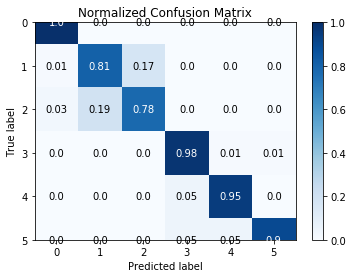

In [0]:
accuracy = accuracy_score(Y_test, y_predicted)*100
print(round(accuracy, 2), '%')
print(confusion_matrix(Y_test, y_predicted))
print (classification_report(Y_test,y_predicted))
skplt.metrics.plot_confusion_matrix(Y_test,y_predicted, normalize=True)
plt.show()

In [0]:
#kNN

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train_s, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

[[250   7   5   0   0   0]
 [  2 250  32   0   0   0]
 [  1  15 260   0   0   0]
 [  0   0   0 240   0   0]
 [  0   0   0   1 176   1]
 [  0   0   0   2   0 229]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       262
           1       0.92      0.88      0.90       284
           2       0.88      0.94      0.91       276
           3       0.99      1.00      0.99       240
           4       1.00      0.99      0.99       178
           5       1.00      0.99      0.99       231

    accuracy                           0.96      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



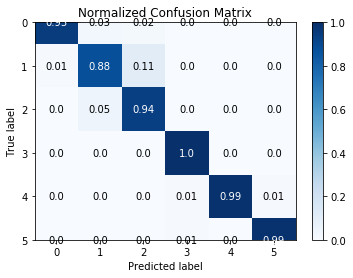

In [0]:
Y_pred = classifier.predict(X_test_s)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
plt.show()
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True)
plt.show()

In [0]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, Y_pred)*100,'%')
#print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')
print(classification_report(Y_test,Y_pred))


95.51325628823929 %
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       262
           1       0.92      0.88      0.90       284
           2       0.88      0.94      0.91       276
           3       0.99      1.00      0.99       240
           4       1.00      0.99      0.99       178
           5       1.00      0.99      0.99       231

    accuracy                           0.96      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



Text(0, 0.5, 'Mean Error')

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

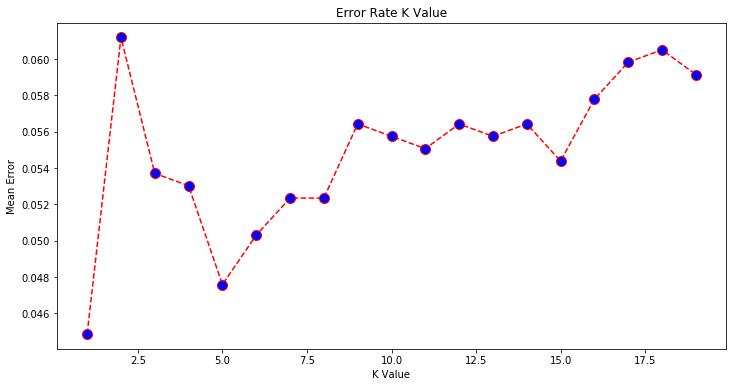

In [0]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, Y_train)
    pred_i = knn.predict(X_test_s)
    error.append(np.mean(pred_i != Y_test))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import math 
import io
import scikitplot as skplt

In [0]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [0]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_s, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_s)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9818058153375276 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [0]:
print("Training set score for SVM: %f" % final_model.score(X_train_s , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_s  , Y_test ))

svm_model.score

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.981645


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [0]:
print("Training set score for SVM: %f" % final_model.score(X_train_s , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_s  , Y_test ))

svm_model.score

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.981645


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

[[262   0   0   0   0   0]
 [  0 274  10   0   0   0]
 [  0  16 260   0   0   0]
 [  0   0   0 239   0   1]
 [  0   0   0   0 178   0]
 [  0   0   0   0   0 231]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.94      0.96      0.95       284
           2       0.96      0.94      0.95       276
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       178
           5       1.00      1.00      1.00       231

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       0.94      0.96      0.95       284
           2       0.96      0.94      0.95       276
           3       1.00      1.00      1.00       240
           4       1.

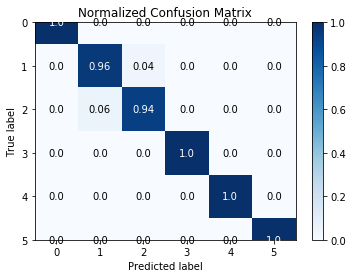

In [0]:
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True)
plt.show()

In [0]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
  
# making predictions on the testing set 
y_pred_nb = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred_nb)*100)

Gaussian Naive Bayes model accuracy(in %): 88.64717878993882


[[261   0   0   0   1   0]
 [  8 219  57   0   0   0]
 [  9  29 237   0   0   1]
 [  0   0   0 219  14   7]
 [  0   0   0   8 155  15]
 [  0   0   0   3  15 213]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       262
           1       0.88      0.77      0.82       284
           2       0.81      0.86      0.83       276
           3       0.95      0.91      0.93       240
           4       0.84      0.87      0.85       178
           5       0.90      0.92      0.91       231

    accuracy                           0.89      1471
   macro avg       0.89      0.89      0.89      1471
weighted avg       0.89      0.89      0.89      1471

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       262
           1       0.88      0.77      0.82       284
           2       0.81      0.86      0.83       276
           3       0.95      0.91      0.93       240
           4       0.

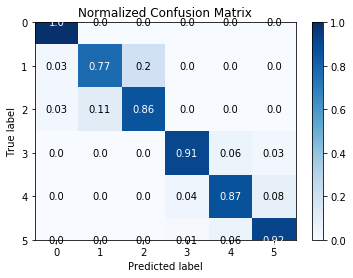

In [0]:
print(confusion_matrix(Y_test, y_pred_nb))
print("\n")
print(classification_report(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))
skplt.metrics.plot_confusion_matrix(Y_test, y_pred_nb, normalize=True)
plt.show()